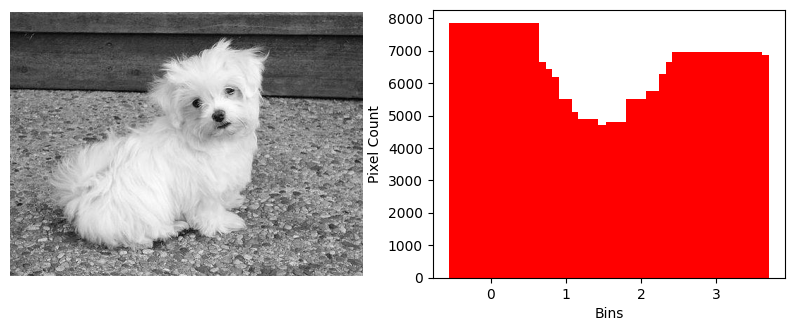

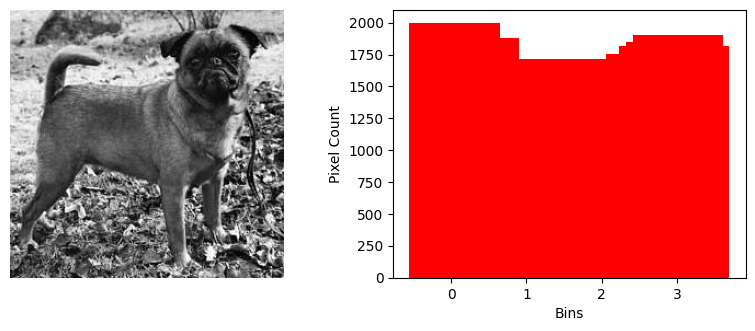

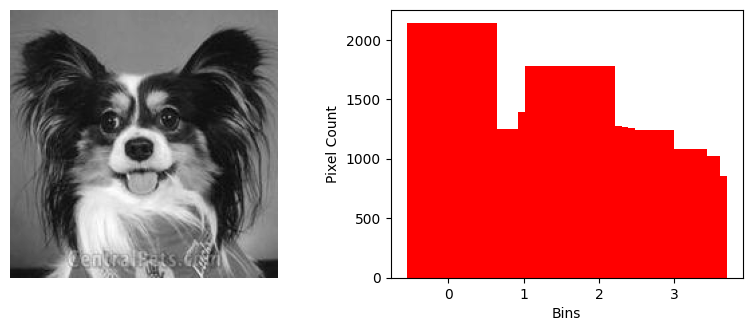

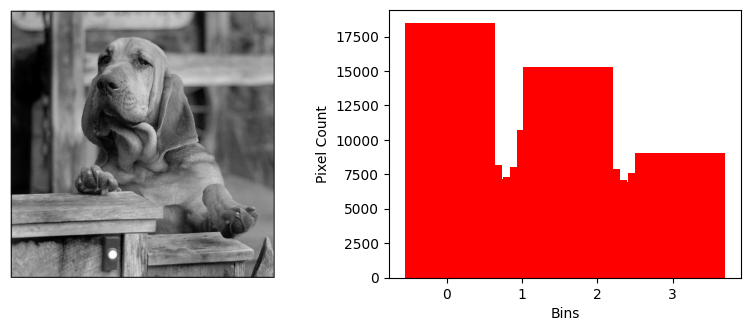

In [1]:
import numpy as np
from skimage import filters
import cv2
import matplotlib.pyplot as plt
from skimage import exposure

# Function to calculate the angle between horizontal and vertical Sobel operators
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

# list of image file paths
image_paths = [
    "C:/Users/HP/Data_Mining/Standford Dogs Dataset/images/Images/n02085936-Maltese_dog/n02085936_850.jpg",
    "C:/Users/HP/Data_Mining/Standford Dogs Dataset/images/Images/n02112706-Brabancon_griffon/n02112706_781.jpg",
    "C:/Users/HP/Data_Mining/Standford Dogs Dataset/images/Images/n02086910-papillon/n02086910_5017.jpg",
    "C:/Users/HP/Data_Mining/Standford Dogs Dataset/images/Images/n02088466-bloodhound/n02088466_10506.jpg"
]

for i, path in enumerate(image_paths):
    # Image to grayscale image
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        
        # Calculate horizontal and vertical Sobel edges
        sobel_h = filters.sobel_h(img)
        sobel_v = filters.sobel_v(img)
        
        # Calculate the angle of the edge gradient
        angle_sobel = angle(sobel_h, sobel_v)
        
        # Obtain the histogram with 36 bins
        hist, bin_centers = exposure.histogram(angle_sobel, nbins=36)

        # Plot the image and histogram side by side
        plt.figure(figsize=(10, 4 * len(image_paths)))
        plt.subplot(len(image_paths), 2, 2 * i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        plt.subplot(len(image_paths), 2, 2 * i + 2)  # Change subplot index for histogram
        plt.bar(bin_centers, hist, width=1.2, color='r')
        plt.xlabel('Bins')
        plt.ylabel('Pixel Count')
    else:
        print(f"Image at path {path} could not be loaded.")